<a href="https://colab.research.google.com/github/rose307/Adventure-works-cycle-/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

In [4]:
# STEP 2: LOAD DATA FROM CSV
df = pd.read_csv('/content/sample_data/sales_data_with_discounts.csv')


In [5]:
# Preview data
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  


In [7]:
# STEP 3: DESCRIPTIVE STATISTICS (Corrected)
numerical_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
                  'Discount Amount', 'Net Sales Value']

# Compute mean, median, std
basic_stats = df[numerical_cols].agg(['mean', 'median', 'std'])

# Compute mode separately (returns first mode only for simplicity)
modes = df[numerical_cols].mode().iloc[0]
basic_stats.loc['mode'] = modes

# Display the combined statistics
print("\nDescriptive Statistics (Mean, Median, Std, Mode):\n")
print(basic_stats)


Descriptive Statistics (Mean, Median, Std, Mode):

          Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
mean    5.066667  10453.433333       33812.835556          15.155242   
median  4.000000   1450.000000        5700.000000          16.577766   
std     4.231602  18079.904840       50535.074173           4.220602   
mode    3.000000    400.000000       24300.000000           5.007822   

        Discount Amount  Net Sales Value  
mean        3346.499424     30466.336131  
median       988.933733      4677.788059  
std         4509.902963     46358.656624  
mode          69.177942       326.974801  


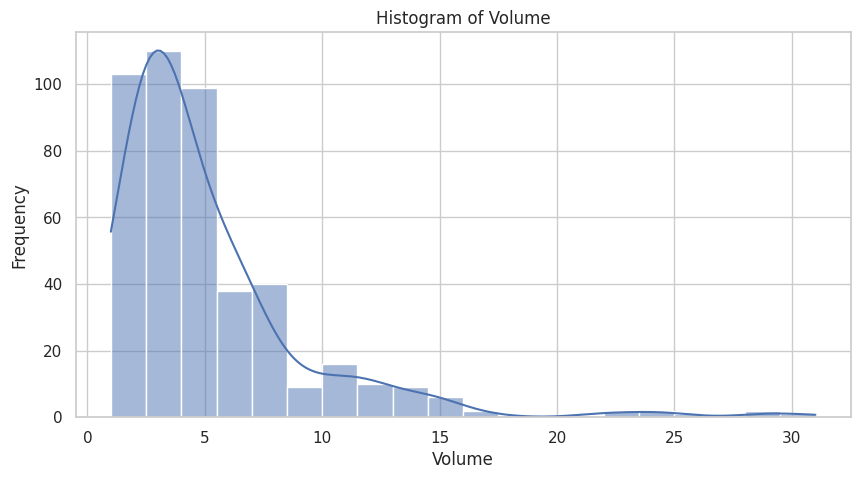

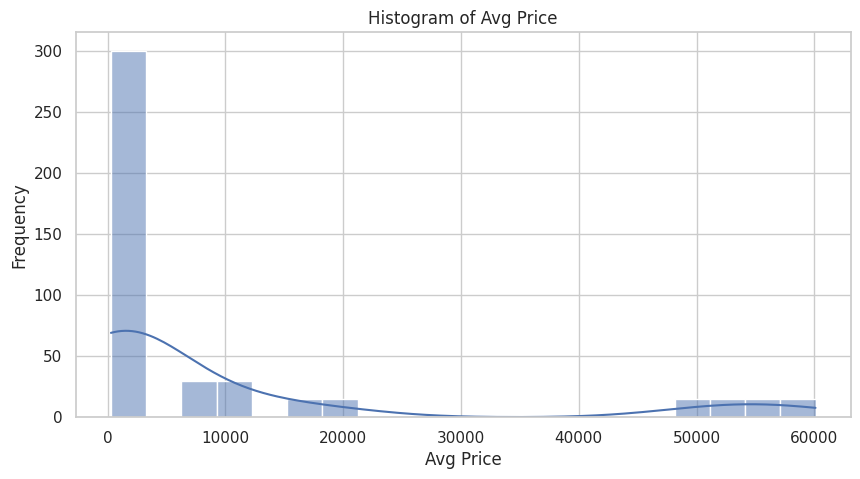

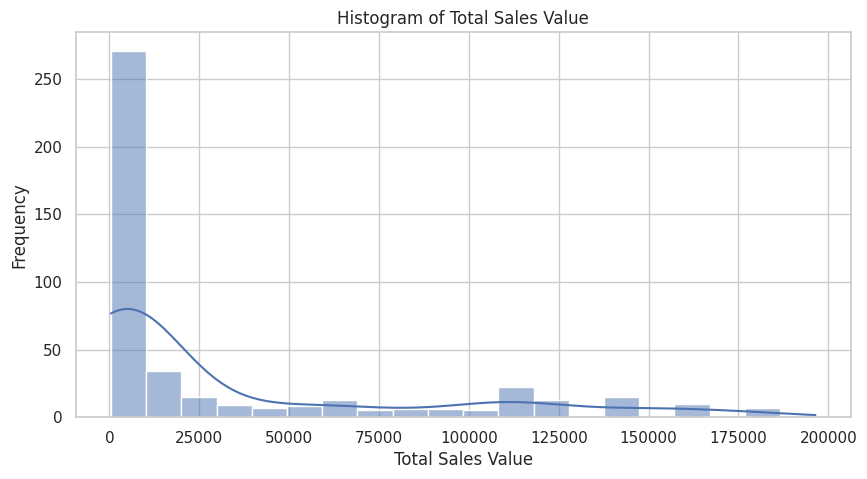

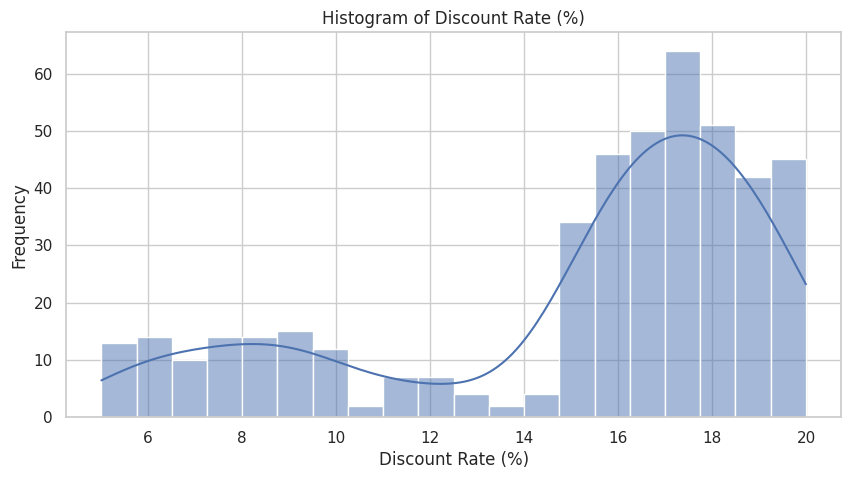

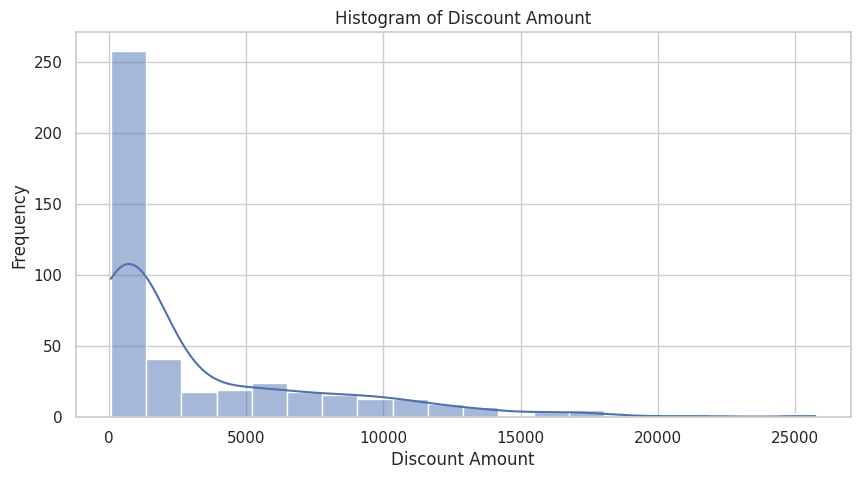

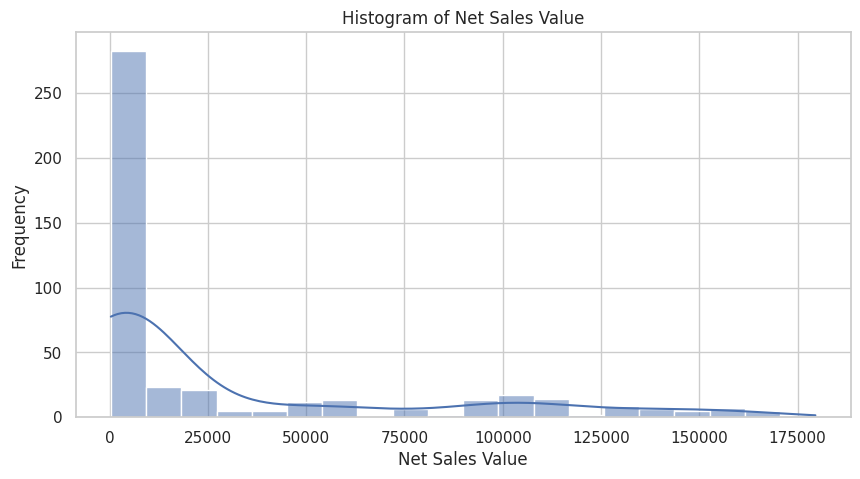

In [8]:
# STEP 4: HISTOGRAMS
for col in numerical_cols:
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

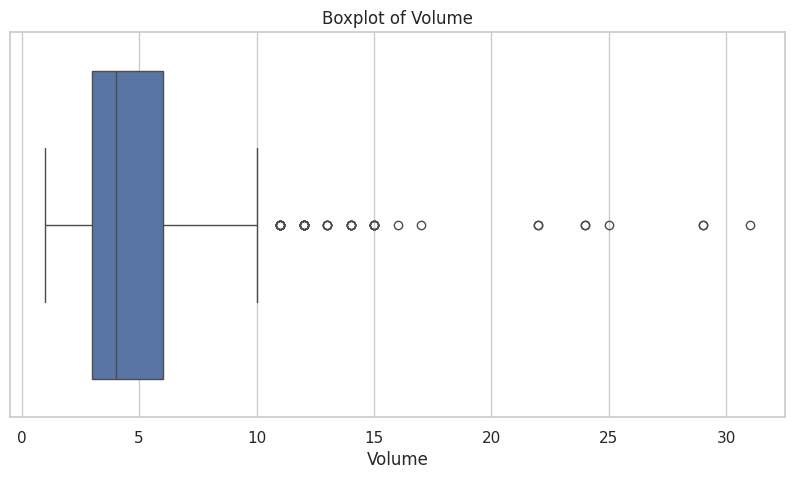

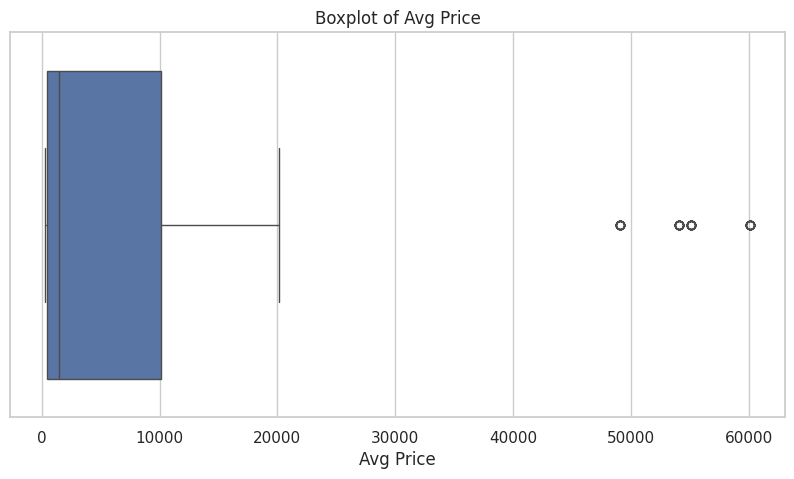

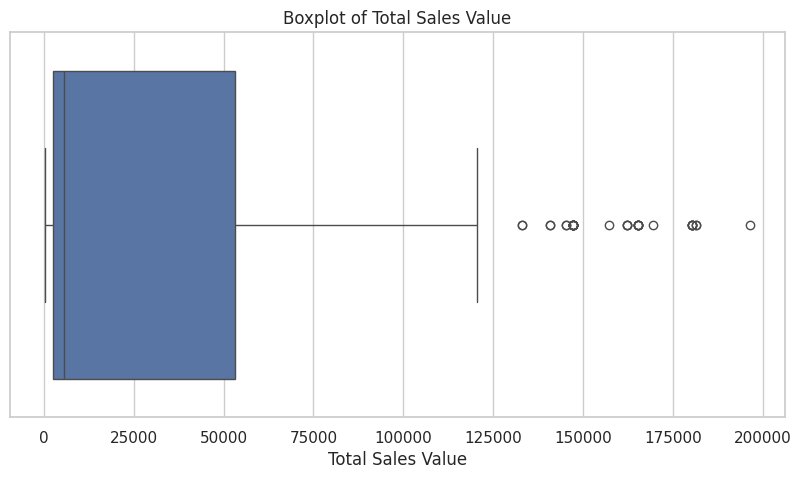

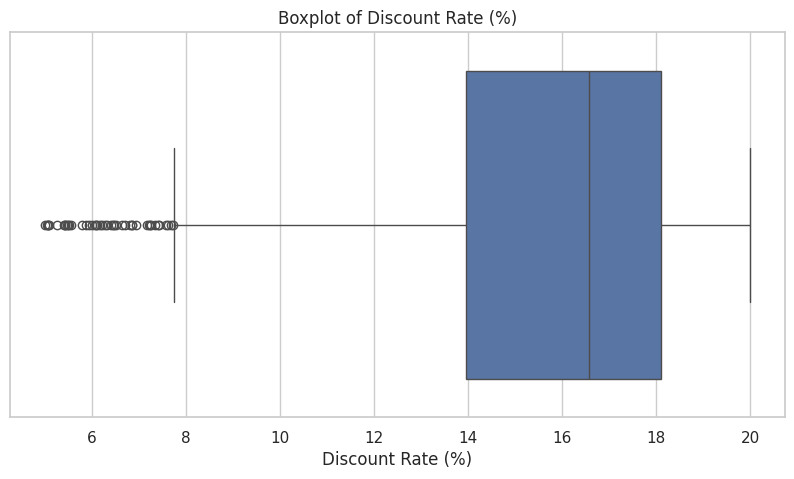

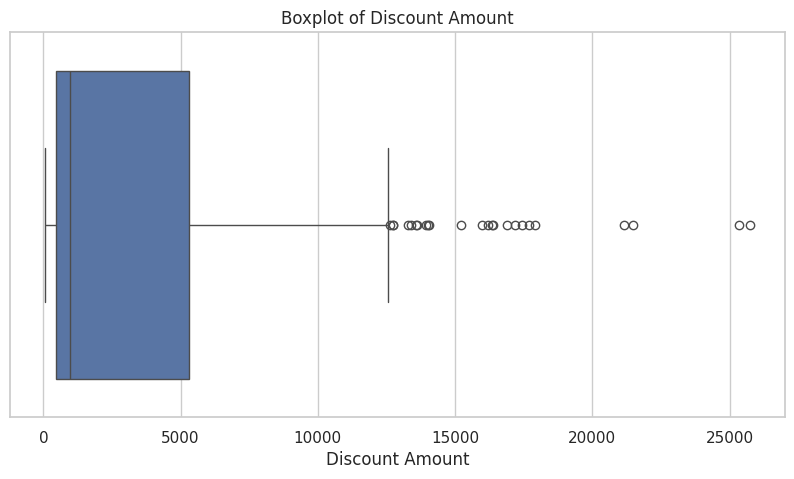

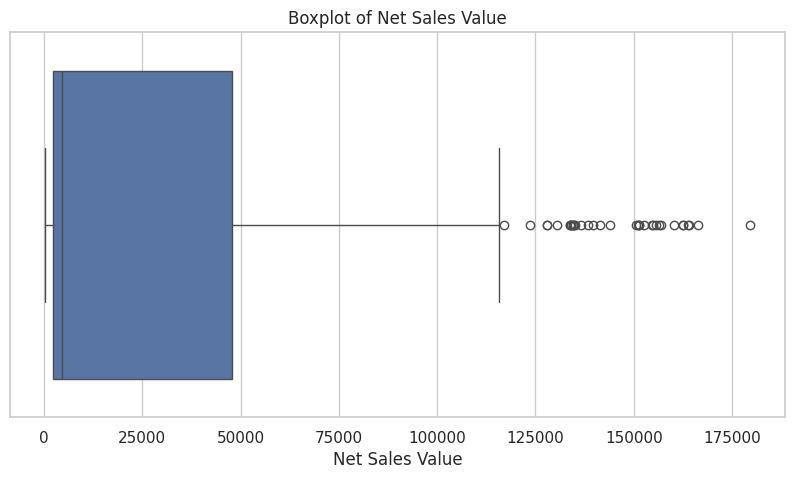

In [9]:
# STEP 5: BOXPLOTS
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

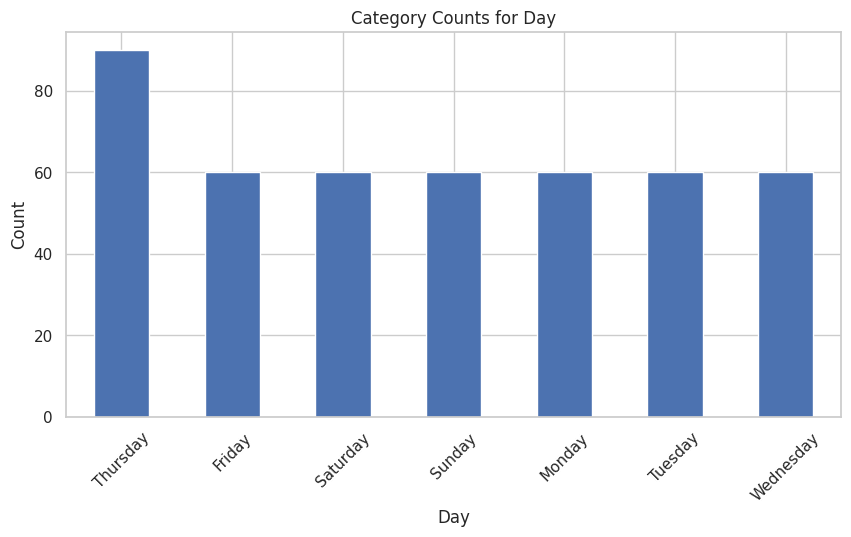

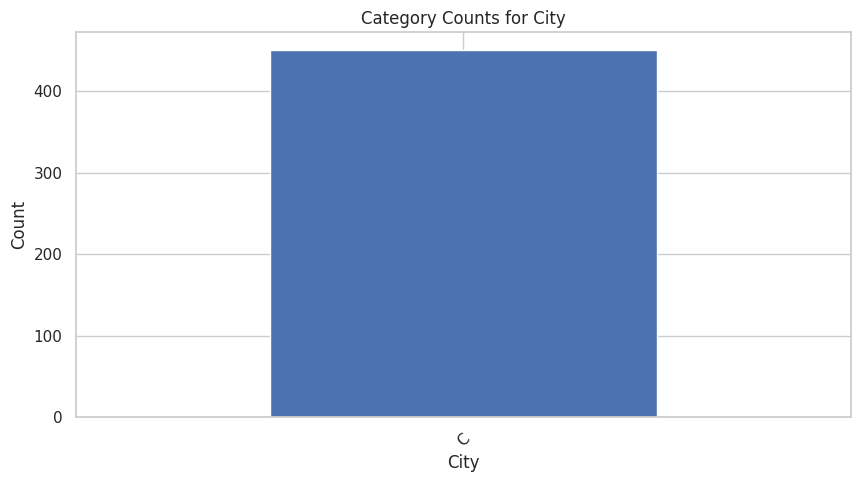

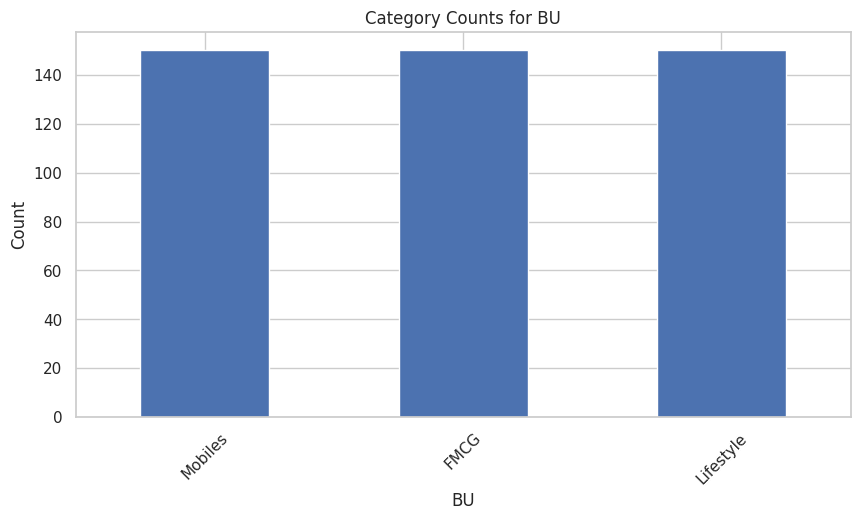

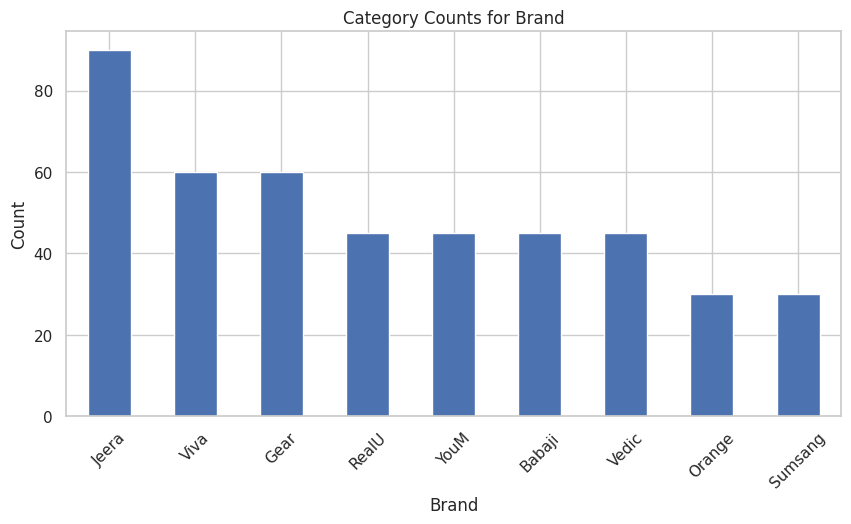

In [10]:
# STEP 6: BAR CHARTS FOR CATEGORICAL VARIABLES
categorical_cols = ['Day', 'City', 'BU', 'Brand']

for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Category Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
# STEP 7: STANDARDIZATION (Z-score)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Compare before and after
print("\nBefore Standardization:\n", df[numerical_cols].head())
print("\nAfter Standardization:\n", df_standardized[numerical_cols].head())



Before Standardization:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  

After Standardization:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146  

In [12]:
# STEP 8: ONE-HOT ENCODING (DUMMY VARIABLES)
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Show a sample of the transformed data
print("\nTransformed Data with One-Hot Encoding:\n", df_encoded.head())


Transformed Data with One-Hot Encoding:
          Date  SKU  Volume       Model  Avg Price  Total Sales Value  \
0  01-04-2021  M01      15       RU-10      12100             181500   
1  01-04-2021  M02      10   RU-9 Plus      10100             101000   
2  01-04-2021  M03       7       YM-99      16100             112700   
3  01-04-2021  M04       6  YM-99 Plus      20100             120600   
4  01-04-2021  M05       3      YM-98        8100              24300   

   Discount Rate (%)  Discount Amount  Net Sales Value  Day_Friday  ...  \
0          11.654820     21153.498820    160346.501180       False  ...   
1          11.560498     11676.102961     89323.897039       False  ...   
2           9.456886     10657.910157    102042.089843       False  ...   
3           6.935385      8364.074702    112235.925298       False  ...   
4          17.995663      4372.946230     19927.053770       False  ...   

   BU_Mobiles  Brand_Babaji  Brand_Gear  Brand_Jeera  Brand_Orange  \
0   